In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
import json
from tqdm.notebook import tqdm
json_path_prefix, json_path_suffix = r"E:\nsclc\data\nnUNet_results\Dataset001_Thesis\nnUNetTrainer__nnUNetPlans__3d_fullres\fold_", r"\validation\summary.json" # <- normal cts :)"
#json_path = r"D:\nsclc\data\nnUNet_results\\Dataset003_Extracted\nnUNetTrainer__nnUNetPlans__3d_lowres\fold_0\validation\summary.json" # <- segmented lungs, but they suck :(
#open json
y = []
for n in tqdm(range(4), colour="blue", desc="loading results"):
    json_path = json_path_prefix + str(n) + json_path_suffix
    with open(json_path, "r") as f:
        magic = json.load(f)
        data = magic['metric_per_case']


    for x in data:
        #copy in tmp x['metrics']['1']
        tmp = x['metrics']['1']
        
        tmp['name'] = os.path.basename(x['reference_file'])
        tmp['name'] = tmp['name'].replace('.nii.gz', '')
        y.append(tmp)

#convert to dataframe
df = pd.DataFrame(y)
#make name index
df.set_index('name', inplace=True)

df = df[df.index.str.contains("INT")]
df.head()

loading results:   0%|          | 0/4 [00:00<?, ?it/s]

,Dice,FN,FP,IoU,TN,TP,n_pred,n_ref
name,,,,,,,,
INT1010016,0.000000,317,1184,0.000000,76020259,0,1184,317
INT1010031,0.631358,0,7740,0.461303,50055136,6628,14368,6628
INT1010037,0.000000,1974,4922,0.000000,57140496,0,4922,1974
INT1010045,0.000000,21396,16253,0.000000,152005871,0,16253,21396
INT1010048,0.000049,218357,392901,0.000025,66497591,15,392916,218372


In [2]:
magic['foreground_mean']

{'Dice': 0.4254270896946451,
 'FN': 609150.2446043165,
 'FP': 35782.41726618705,
 'IoU': 0.32154025415001514,
 'TN': 40866412.20143885,
 'TP': 29992.460431654676,
 'n_pred': 65774.87769784173,
 'n_ref': 639142.7050359712}

In [3]:
#sort by dice descending in df_sort_desc
df_sort_desc = df.sort_values('Dice', ascending=False)
df_sort_desc.head(10)

,Dice,FN,FP,IoU,TN,TP,n_pred,n_ref
name,,,,,,,,
INT1010570,0.948943,5370,1689,0.902846,84599854,65599,67288,70969
INT1010194,0.930515,393,955,0.870060,51631994,9026,9981,9419
INT1010355,0.924635,11747,2752,0.859834,78801902,88943,91695,100690
INT1010392,0.909389,27684,10076,0.833835,141330516,189484,199560,217168
INT1010622,0.905431,743,2250,0.827204,63945815,14328,16578,15071
INT1010448,0.897869,3704,12377,0.814667,22981904,70687,83064,74391
INT1010450,0.868479,117336,10342,0.767533,71540369,421553,431895,538889
INT1010111,0.863839,21340,21492,0.760313,154748404,135868,157360,157208
INT1010217,0.863830,1048,16366,0.760300,40035383,55235,71601,56283


In [4]:
df.describe()

,Dice,FN,FP,IoU,TN,TP,n_pred,n_ref
count,229.000000,2.290000e+02,2.290000e+02,229.000000,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02
mean,0.386448,3.901279e+05,6.891779e+04,0.289928,6.049317e+07,4.148088e+04,1.103987e+05,4.316088e+05
std,0.311524,4.242476e+06,1.316553e+05,0.265431,4.907198e+07,9.833454e+04,1.728797e+05,4.272386e+06
min,0.000000,0.000000e+00,0.000000e+00,0.000000,6.218940e+05,0.000000e+00,2.300000e+02,1.340000e+02
25%,0.058646,8.810000e+02,8.833000e+03,0.030209,2.457462e+07,1.388000e+03,1.674900e+04,5.817000e+03
50%,0.350668,4.057000e+03,2.599800e+04,0.212612,5.005514e+07,1.044200e+04,5.766400e+04,2.062900e+04
75%,0.691735,1.428100e+04,6.971800e+04,0.528742,7.114843e+07,4.303900e+04,1.288010e+05,6.824200e+04
max,0.948943,5.999554e+07,1.418008e+06,0.902846,2.777045e+08,1.052426e+06,1.444196e+06,6.049125e+07


In [5]:
#now ascending
df_sort_asc = df.sort_values('Dice', ascending=True)
df_sort_asc.head(10)

,Dice,FN,FP,IoU,TN,TP,n_pred,n_ref
name,,,,,,,,
INT1010016,0.0,317,1184,0.0,76020259,0,1184,317
INT1010623,0.0,8302,145801,0.0,73770505,0,145801,8302
INT1010420,0.0,5817,12547,0.0,18331716,0,12547,5817
INT1010430,0.0,2550,20445,0.0,31958573,0,20445,2550
INT1010616,0.0,2969,127989,0.0,61735026,0,127989,2969
INT1010611,0.0,3332,63587,0.0,24574617,0,63587,3332
INT1010539,0.0,13635,46096,0.0,24843949,0,46096,13635
INT1010374,0.0,26573,233631,0.0,222300052,0,233631,26573
INT1010463,0.0,127936,16749,0.0,22661843,0,16749,127936


In [6]:
#get all rows with Dice < 0.3
df_low_dice = df[df['Dice'] < 0.3]
df_high_dice = df[df['Dice'] >= 0.3]
# print count and then dfhead
print(len(df_low_dice))
df_low_dice.head()

103


,Dice,FN,FP,IoU,TN,TP,n_pred,n_ref
name,,,,,,,,
INT1010016,0.000000,317,1184,0.000000,76020259,0,1184,317
INT1010037,0.000000,1974,4922,0.000000,57140496,0,4922,1974
INT1010045,0.000000,21396,16253,0.000000,152005871,0,16253,21396
INT1010048,0.000049,218357,392901,0.000025,66497591,15,392916,218372
INT1010074,0.212605,0,4385,0.118947,26209423,592,4977,592


df_stats_high_dice
Mean: 95573.56, Std: 175019.45, Mad: 95319.47
df_stats_low_dice
Mean: 842680.98, Std: 6360329.28, Mad: 1592992.18


Text(0.5, 1.0, 'n_ref limited to 5e5')

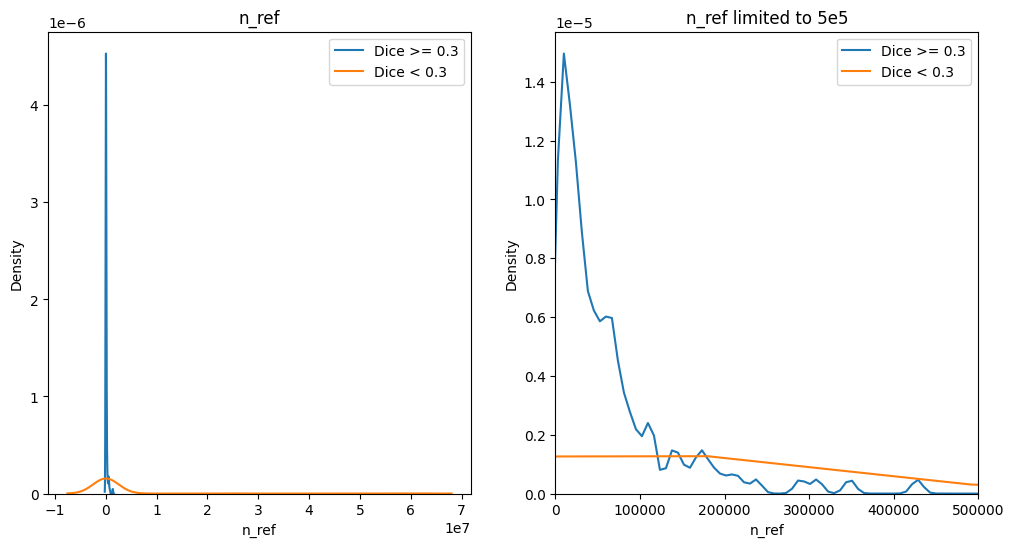

In [7]:
# get in df mean, std, mad of n_ref and print as f_string
df_stats = df_high_dice[['n_ref']].agg(['mean', 'std', 'mad'])
print("df_stats_high_dice")
print(f"Mean: {df_stats.loc['mean', 'n_ref']:.2f}, Std: {df_stats.loc['std', 'n_ref']:.2f}, Mad: {df_stats.loc['mad', 'n_ref']:.2f}")
# do the same in df_low_dice
df_stats_low_dice = df_low_dice[['n_ref']].agg(['mean', 'std', 'mad'])
print("df_stats_low_dice")
print(f"Mean: {df_stats_low_dice.loc['mean', 'n_ref']:.2f}, Std: {df_stats_low_dice.loc['std', 'n_ref']:.2f}, Mad: {df_stats_low_dice.loc['mad', 'n_ref']:.2f}")
#plot kde of both n_ref in one plot
#make a second plot equal to the first but x_lim = 5e5
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
bw_adjust = 1
bw_adjust_lim = 0.1
sns.kdeplot(data=df_high_dice, x='n_ref', ax=axs[0], label='Dice >= 0.3', bw_adjust=bw_adjust)
sns.kdeplot(data=df_low_dice, x='n_ref', ax=axs[0], label='Dice < 0.3', bw_adjust=bw_adjust)

sns.kdeplot(data=df_high_dice, x='n_ref', ax=axs[1], label='Dice >= 0.3', bw_adjust=bw_adjust_lim)
sns.kdeplot(data=df_low_dice, x='n_ref', ax=axs[1], label='Dice < 0.3', bw_adjust=bw_adjust_lim)
axs[1].set_xlim(0, 5e5)

#legend
axs[0].legend()
axs[1].legend()
#title
axs[0].set_title('n_ref')
axs[1].set_title('n_ref limited to 5e5')


# do the same

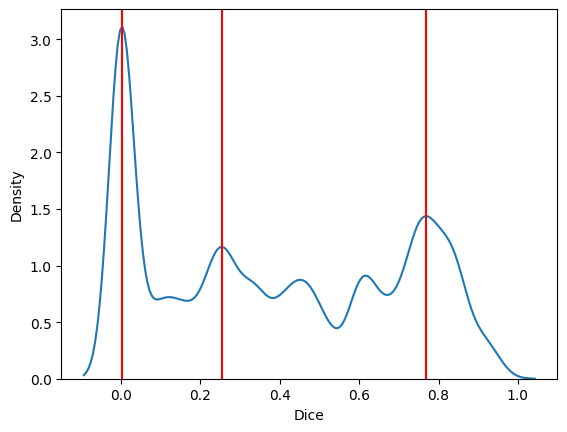

In [8]:
#extract Dice and make kde plot, bandwidth=0.1
kde = sns.kdeplot(df['Dice'], bw_method=0.1)
#find peaks in kde
peaks, _ = find_peaks(kde.get_lines()[0].get_ydata(), height=1)
#plot peaks as vertical lines
for peak in peaks:
    plt.axvline(x=kde.get_lines()[0].get_xdata()[peak], color='r')
#show plot


plt.show()

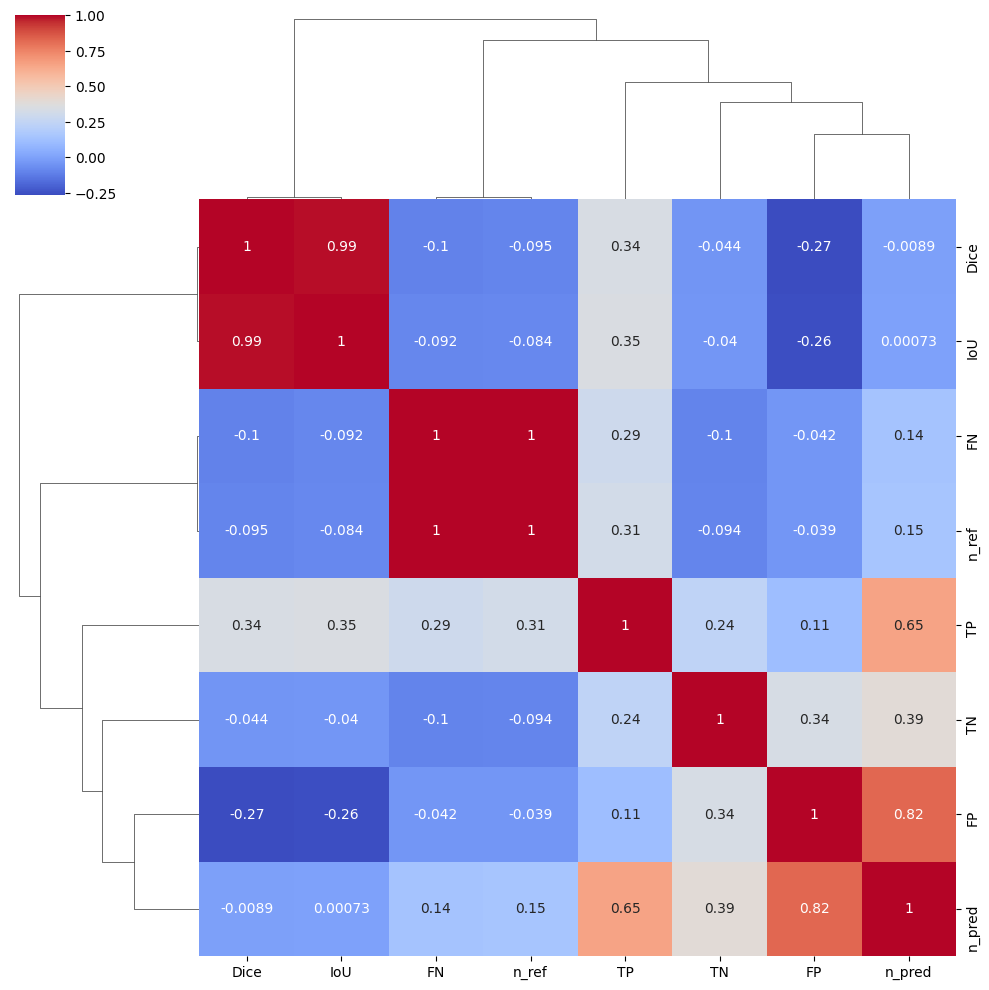

In [9]:
# plot correlation matrix with dendrogram
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', figsize=(10, 10))

In [10]:
#extract the tuples n_ref, Dice
df_ref_dice = df[['n_ref', 'Dice']]
#get n_ref std and delete elements that are above mean + 3*std

std = df_ref_dice['n_ref'].std()
mean = df_ref_dice['n_ref'].mean()

#get median absolute deviation
mad = df_ref_dice['n_ref'].mad()
#df_ref_dice = df_ref_dice[df_ref_dice['n_ref'] < mean + mad]
df_ref_dice = df_ref_dice[df_ref_dice['n_ref'] < 150_000]
#scatter plot

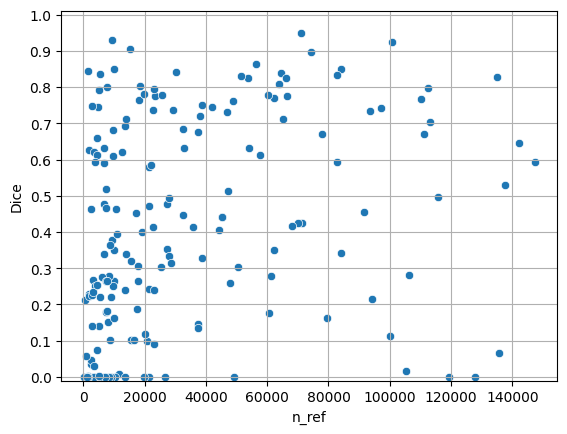

In [11]:
#z score the data
df_z = df_ref_dice.copy()
df_z['Dice'] = (df_z['Dice'] - df_z['Dice'].mean()) / df_z['Dice'].std()
df_z['n_ref'] = (df_z['n_ref'] - df_z['n_ref'].mean()) / df_z['n_ref'].std()
#plot scatterplot
sns.scatterplot(data=df_ref_dice, x='n_ref', y='Dice')
#add grid every, vertical nice every 0.1
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)

#ylim -0.01, 1.01
plt.ylim(-0.01, 1.01)
plt.show()

In [12]:
#from df_z extract X datasef(n_ref) and y dataset(Dice)
X = df_z['n_ref'].values
y = df_z['Dice'].values

X = np.vstack([X, X**2, X**3]).T
X.shape, y.shape

((202, 3), (202,))

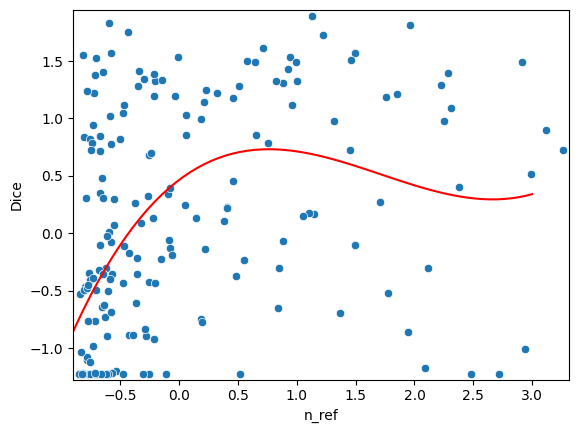

In [13]:
#fit ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X, y)

#plot scatterplot with regression line
sns.scatterplot(data=df_z, x='n_ref', y='Dice')
x = np.linspace(-3, 3, 100)
y_pred = ridge.predict(np.vstack([x, x**2, x**3]).T)
#plot within range of min and max of n_ref
plt.xlim(df_z['n_ref'].min() - 0.05, df_z['n_ref'].max() + 0.05)
plt.ylim(df_z['Dice'].min() - 0.05, df_z['Dice'].max() + 0.05)
plt.plot(x, y_pred, color='r')
